First things first, importing libraries to be used

In [52]:
import numpy as np
from numpy import nan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, time
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style("darkgrid")

In [53]:
# Load the data into the notebook
df = pd.read_csv("train.csv")
df_test = pd.read_csv("ames_test.csv")
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
124,125,20,RL,48.0,17043,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,181000
559,560,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,234000
624,625,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,165150
1334,1335,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,125000
1111,1112,60,RL,80.0,10480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,205000
1226,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,214000
1272,1273,20,RL,NaN,13526,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal,137000
997,998,20,RL,NaN,11717,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,185000
1042,1043,120,RL,34.0,5381,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,196000
725,726,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,11,2009,WD,Normal,120500


In [54]:
# A look at random samples in the data
df_test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1004,2465,50,RL,60.0,8850,Pave,Pave,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal
432,1893,20,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,900,6,2009,WD,Normal
1106,2567,190,RL,79.0,6221,Pave,NaN,IR1,Lvl,AllPub,...,144,0,NaN,MnPrv,NaN,0,10,2007,WD,Normal
1031,2492,20,RL,NaN,11075,Pave,NaN,Reg,Lvl,AllPub,...,168,0,NaN,GdPrv,NaN,0,2,2007,WD,Normal
897,2358,60,RL,NaN,11613,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,5,2007,WD,Normal
559,2020,190,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
22,1483,20,RL,100.0,18494,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1219,2680,60,RL,83.0,9545,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
585,2046,90,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2008,ConLD,Normal
1342,2803,90,RL,120.0,11136,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal


In [55]:
# The number of rows and columns in the test nd train dataset
print("Number of rows in the train dataset: {} \n".format(df.shape[0]), "Number of columns: {} \n".format(df.shape[1]))
print("Number of rows in the test dataset: {} \n".format(df_test.shape[0]), "Number of columns: {} \n".format(df_test.shape[1]))

Number of rows in the train dataset: 1460 
 Number of columns: 81 

Number of rows in the test dataset: 1459 
 Number of columns: 80 



In [56]:
# Summary statistics of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
# Summary statistics
df.describe(include = "all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [58]:
# Combining the test and train data
comb = pd.concat([df, df_test])
comb

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [59]:
# The columns in the data
comb.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Finding and dealing with null/missing values

Based on what is seen above after looking at the test and train dataset, there are a few missing values, so the next step is to check the null values in each column and deal with them. At the end of this, certain columns such as **Id** are being droppped due to having too many values missing or due to there being no relatioship with the target variable (**SalePrice**)

#### Finding missing values

In [60]:
null = []
drop = [] #range(0,comb.shape[1])
for i in comb.columns:
    if 0 < comb[i].isna().sum() <= comb.shape[0]*(0.3):
        null.append(i) 
    elif comb[i].isna().sum() > comb.shape[0]*(0.3):
        drop.append(i)
print(null, "\n")
print(drop)

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'] 

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']


The columns have been sorted into two parts, the columns with more than 30% missing and columns with less than 30% missing values

In [61]:
# A look at columns with missing values greater than 30 % in the train data
for col in df.columns:
    if col in drop:
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))

Alley column missing values: 1369
FireplaceQu column missing values: 690
PoolQC column missing values: 1453
Fence column missing values: 1179
MiscFeature column missing values: 1406
SalePrice column missing values: 0


In [62]:
# A look at the missing categorical data
ty = comb.select_dtypes("object")
for col in ty.columns.tolist():
    if col in null:
        print('{} column missing values: {}'.format(col, ty[col].isnull().sum()))

MSZoning column missing values: 4
Utilities column missing values: 2
Exterior1st column missing values: 1
Exterior2nd column missing values: 1
MasVnrType column missing values: 24
BsmtQual column missing values: 81
BsmtCond column missing values: 82
BsmtExposure column missing values: 82
BsmtFinType1 column missing values: 79
BsmtFinType2 column missing values: 80
Electrical column missing values: 1
KitchenQual column missing values: 1
Functional column missing values: 2
GarageType column missing values: 157
GarageFinish column missing values: 159
GarageQual column missing values: 159
GarageCond column missing values: 159
SaleType column missing values: 1


In [63]:
des = []
for i in list(df):
    if i in list(null):
        if i not in list(ty):
            des.append(i)        
for col in des:          
    print('{} column missing values: {}'.format(col, df[col].isnull().sum()))

LotFrontage column missing values: 259
MasVnrArea column missing values: 8
BsmtFinSF1 column missing values: 0
BsmtFinSF2 column missing values: 0
BsmtUnfSF column missing values: 0
TotalBsmtSF column missing values: 0
BsmtFullBath column missing values: 0
BsmtHalfBath column missing values: 0
GarageYrBlt column missing values: 81
GarageCars column missing values: 0
GarageArea column missing values: 0


#### Filling null values

In [64]:
comb["BsmtFinSF1"] = comb["BsmtFinSF1"].fillna(comb["BsmtFinSF1"].mean())
comb["BsmtFinSF2"] = comb["BsmtFinSF2"].fillna(comb["BsmtFinSF2"].mean())
comb["BsmtUnfSF"] = comb["BsmtUnfSF"].fillna(comb["BsmtUnfSF"].mean())
comb["BsmtFullBath"] = comb["BsmtFullBath"].fillna(comb["BsmtFullBath"].mode())
comb["BsmtHalfBath"] = comb["BsmtHalfBath"].fillna(comb["BsmtHalfBath"].mode())

In [65]:
comb["LotFrontage"] = comb.LotFrontage.fillna(comb.LotFrontage.median())
comb["GarageYrBlt"] = comb["GarageYrBlt"].fillna(comb.GarageYrBlt.median())
comb["MasVnrArea"] = comb.MasVnrArea.replace(np.nan, 0)
comb.Electrical = comb.Electrical.fillna(comb.Electrical.value_counts().index[0])
comb.Functional = comb.Functional.fillna(comb.Electrical.value_counts().index[0])
comb.Exterior1st = comb.Exterior1st.fillna(comb.Exterior1st.value_counts().index[0])
comb.Exterior2nd = comb.Exterior2nd.fillna(comb.Exterior2nd.value_counts().index[0])
comb.Utilities = comb.Utilities.fillna(comb.Utilities.value_counts().index[0])
comb.MSZoning = comb.MSZoning.fillna(comb.MSZoning.value_counts().index[0])

In [66]:
comb["GarageCond"] = comb["GarageCond"].fillna(comb.GarageCond.value_counts().index[0])
comb["GarageQual"] = comb["GarageQual"].fillna(comb.GarageQual.value_counts().index[0])
comb["GarageFinish"] = comb["GarageFinish"].fillna(comb.GarageFinish.value_counts().index[0])
comb["GarageType"] = comb["GarageType"].fillna(comb.GarageType.value_counts().index[0])

In [67]:
comb["BsmtCond"] = comb["BsmtCond"].fillna(comb.BsmtCond.value_counts().index[0])
comb["BsmtQual"] = comb["BsmtQual"].fillna(comb.BsmtQual.value_counts().index[0])
comb["BsmtExposure"] = comb["BsmtExposure"].fillna(comb.BsmtExposure.value_counts().index[0])
comb["BsmtFinType1"] = comb["BsmtFinType1"].fillna(comb.BsmtFinType1.value_counts().index[0])
comb["BsmtFinType2"] = comb["BsmtFinType2"].fillna(comb.BsmtFinType2.value_counts().index[0])

In [68]:
comb["GarageCars"] = comb["GarageCars"].fillna(comb.GarageCars.value_counts().index[0])
comb["KitchenQual"] = comb["KitchenQual"].fillna(comb.KitchenQual.value_counts().index[0])
comb["ExterQual"] = comb["ExterQual"].fillna(comb.ExterQual.value_counts().index[0])
comb["TotalBsmtSF"] = comb["TotalBsmtSF"].fillna(comb["TotalBsmtSF"].mean())
comb["GarageArea"] = comb["GarageArea"].fillna(comb.GarageArea.mean())
comb["SaleType"] = comb["SaleType"].fillna(comb.SaleType.value_counts().index[0])
comb["MasVnrType"] = comb["MasVnrType"].fillna(comb["MasVnrType"].value_counts().index[0])

In [69]:
comb["BsmtFullBath"] = comb["BsmtFullBath"].fillna(comb["BsmtFullBath"].value_counts().index[1])
comb["BsmtHalfBath"] = comb["BsmtHalfBath"].fillna(comb["BsmtHalfBath"].value_counts().index[1])
comb["FireplaceQu"] = comb["FireplaceQu"].fillna("NA")

In [70]:
comb["Age"] = comb["YrSold"] - comb["YearBuilt"]
comb['Renov']=comb['YrSold'] - comb['YearRemodAdd']

Using mutual information method to check the relationship between the features and the target(**SalePrice**)

In [71]:
# Dropping columns for the feature importance
let = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', "Id", "MoSold", "PoolArea", "Street", "Utilities", "Functional", "LandSlope", "3SsnPorch", "Condition2", "YrSold", "BsmtFinSF2", "RoofMatl", "MiscVal", "LowQualFinSF", "LotConfig", "BsmtFinType2", "KitchenAbvGr", "RoofStyle", "Heating", "BsmtHalfBath", "BsmtFullBath", "Condition1", "EnclosedPorch", "Age", "Renov", "FireplaceQu", "SalePrice"]
comb2 = comb.drop(let, axis = 1)

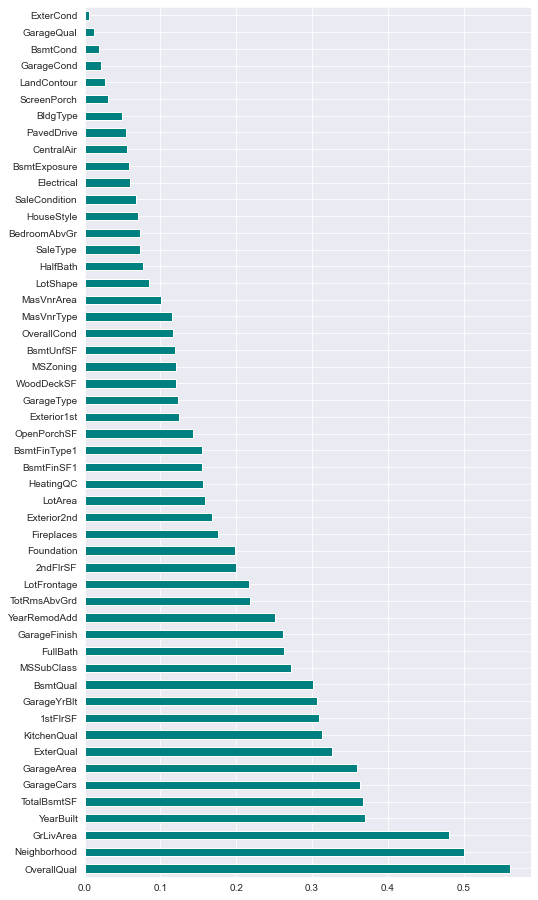

In [72]:
# Creating X and y 
y = df.SalePrice
X = comb2.iloc[0:1460,].copy()

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

# Importing library
from sklearn.feature_selection import mutual_info_regression

importances = mutual_info_regression(X, y, discrete_features = discrete_features)
feat_importance = pd.Series(importances, index =X.columns)
mi_scores = feat_importance.sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize = (8, 16))
mi_scores.plot(kind = "barh", color = "teal")
plt.show()

As seen in the plot above, 

### Data visuaization

After dealing with the missing values and doing a little feature engineering, further insight is needed on the data thus visualization of data is done 

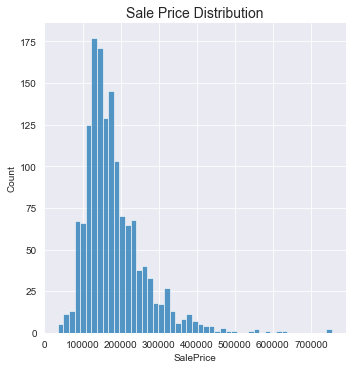

In [73]:
# Plot showing distribution of sale price
sns.displot(df.SalePrice, kde = False)
plt.title("Sale Price Distribution", fontsize = 14)
plt.show()

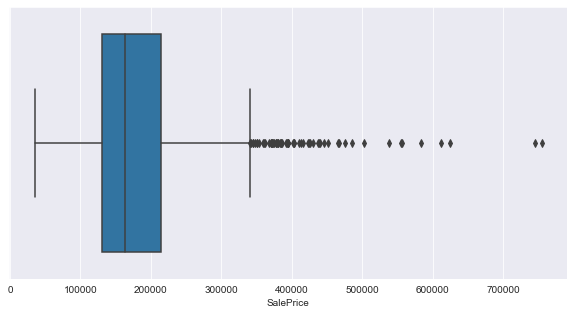

In [74]:
# Boxplot of sale price
plt.figure(figsize = (10, 5))
sns.boxplot(x = "SalePrice", data = df)
plt.show()

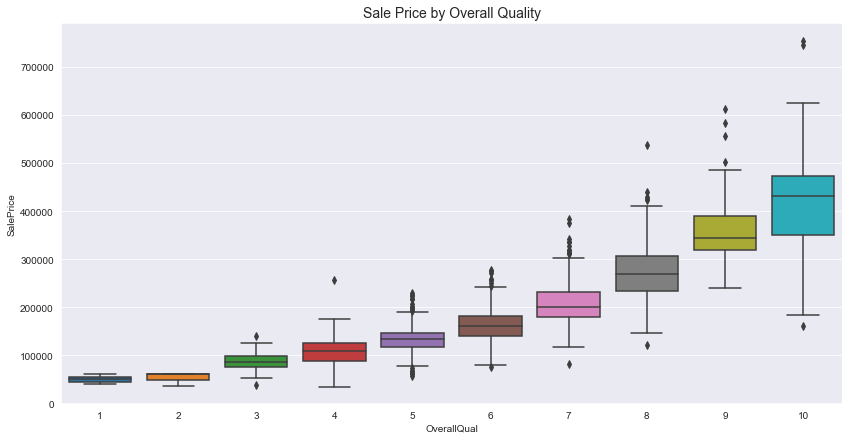

In [75]:
# Boxplot showing sale price by overall house quality
plt.figure(figsize = (14,7))
sns.boxplot(x = "OverallQual", y = "SalePrice", data = df)
plt.title("Sale Price by Overall Quality", fontsize = 14)
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

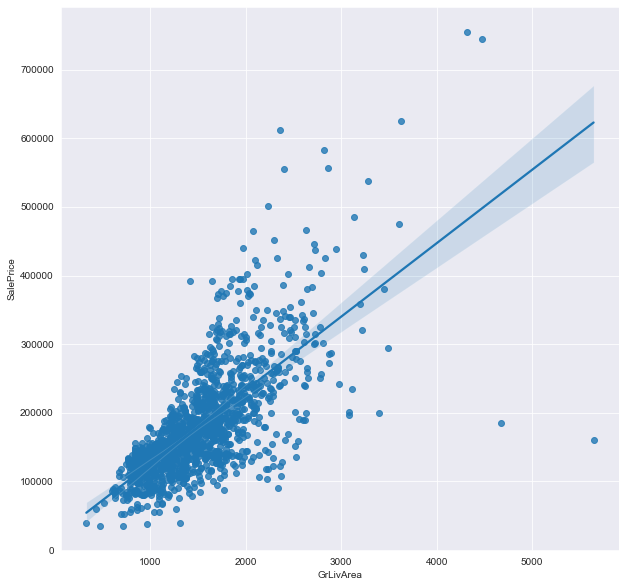

In [76]:
# PLot of Sales price by living area
plt.figure(figsize = (10,10))
sns.regplot(x = df.GrLivArea, y = df.SalePrice)

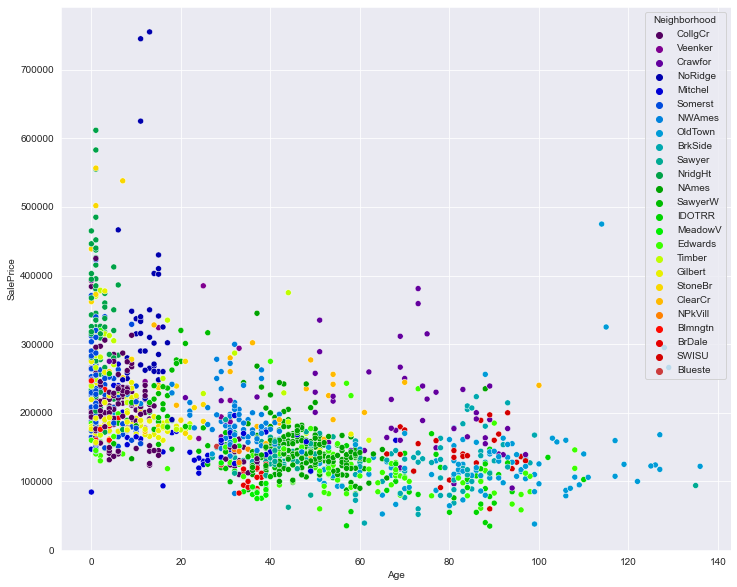

In [77]:
# Plot showing sale price by age with neigborhood
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "Age", y = "SalePrice", hue = "Neighborhood", data = comb, palette = "nipy_spectral")
plt.show()

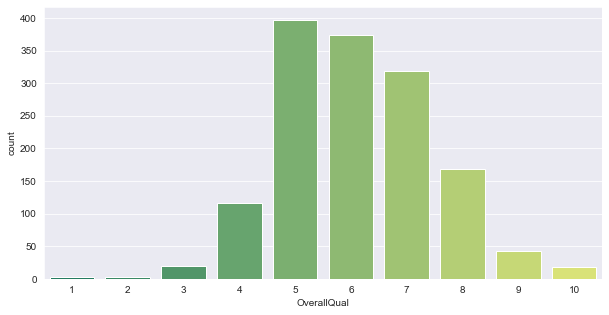

In [78]:
# Plot showing sale price by the overall quality of house 
plt.figure(figsize = (10, 5))
sns.countplot(x = df.OverallQual, palette = "summer")
plt.show()

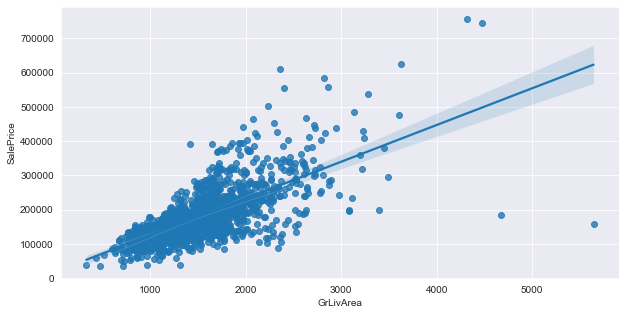

In [79]:
# plot showing correlation between sale price and living area
plt.figure(figsize = (10, 5))
sns.regplot(x = "GrLivArea", y = "SalePrice", data = df)
plt.show()

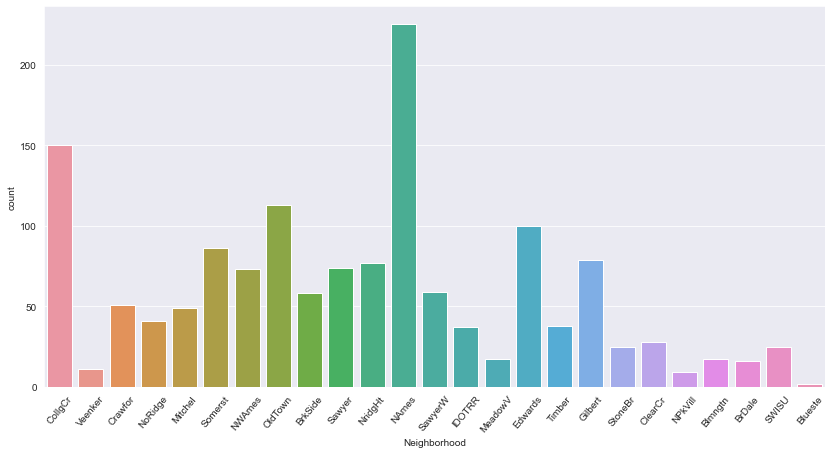

In [80]:
# Count plot of neighborhood
plt.figure(figsize = (14, 7))
neig = sns.countplot(x = df.Neighborhood)
neig.set_xticklabels(neig.get_xticklabels(), rotation=50)
plt.show()

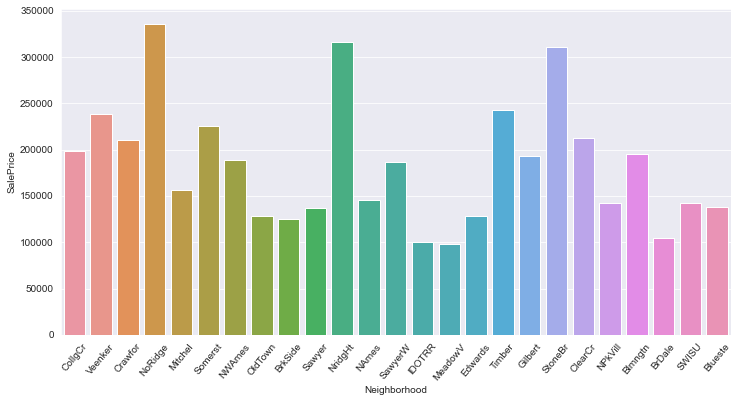

In [81]:
# Plot of sale price by neighborhood
plt.figure(figsize = (12, 6))
ne_sale = sns.barplot(x= "Neighborhood", y = "SalePrice", data = df, ci = None)
ne_sale.set_xticklabels(ne_sale.get_xticklabels(), rotation=50);

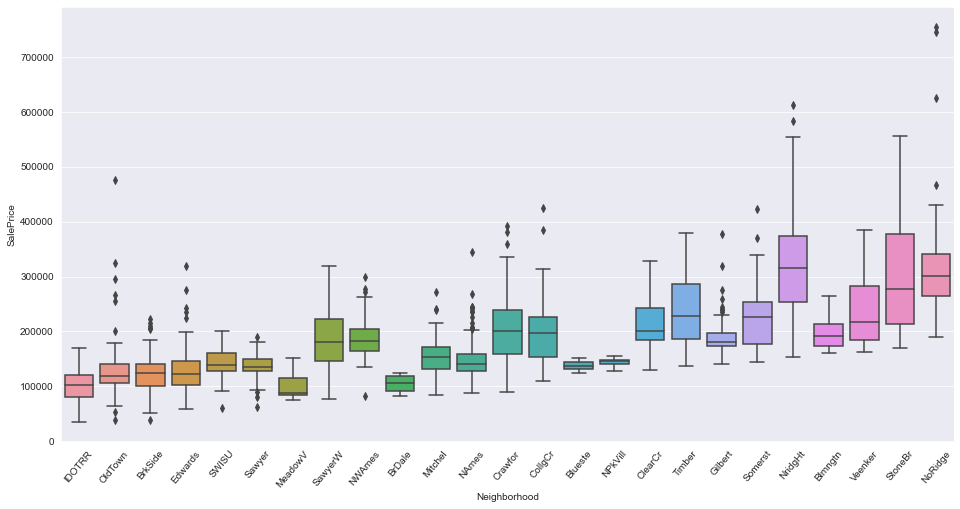

In [82]:
# Boxplot of sales price b neighorhood
saleP = df.sort_values("SalePrice", ascending = True)
plt.figure(figsize = (16, 8))
bx_sale = sns.boxplot(x= "Neighborhood", y = "SalePrice", data = saleP)
bx_sale.set_xticklabels(bx_sale.get_xticklabels(), rotation=50);

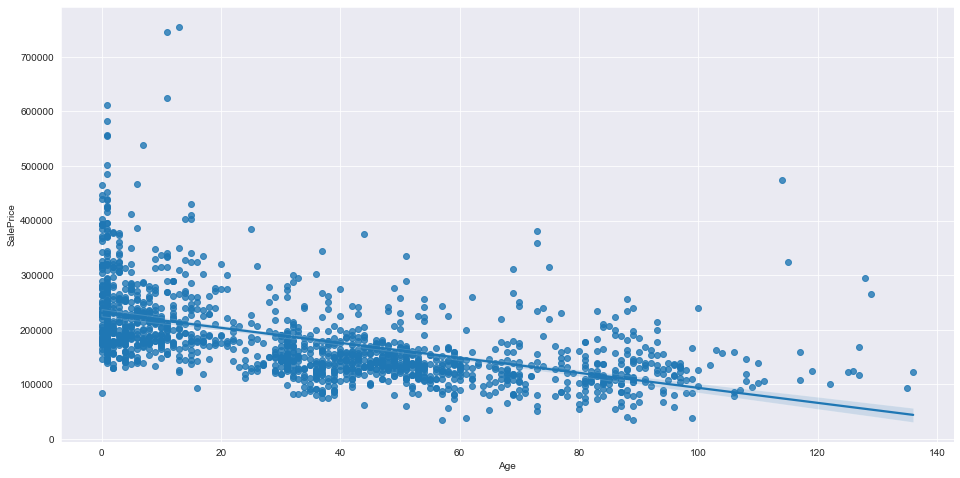

In [83]:
# Plot showing sale price by age og house
plt.figure(figsize = (16, 8))
sns.regplot(x = "Age", y = "SalePrice", data = comb)
plt.show()

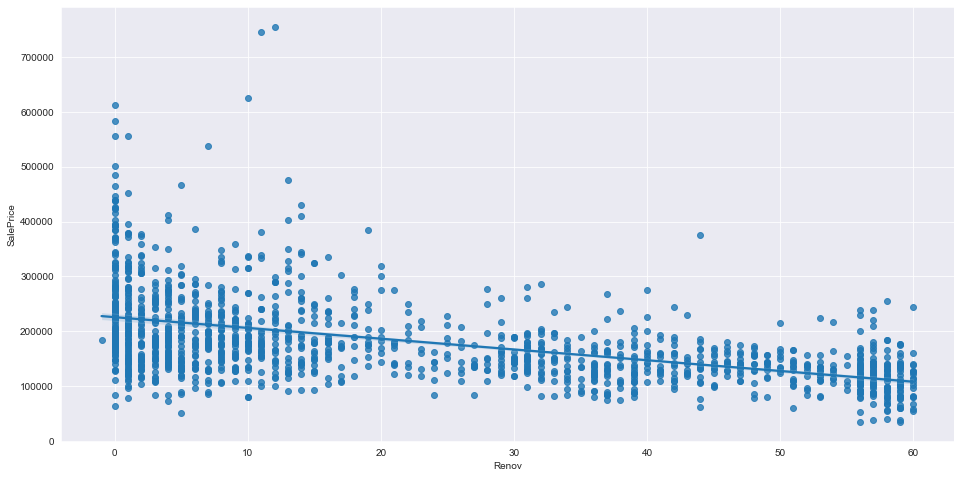

In [84]:
# Plot showing Sale price by renovation
plt.figure(figsize = (16, 8))
sns.regplot(x = "Renov", y = "SalePrice", data = comb)
plt.show()

In [85]:
corr = df.corr()
corr.SalePrice.sort_index()

1stFlrSF         0.605852
2ndFlrSF         0.319334
3SsnPorch        0.044584
BedroomAbvGr     0.168213
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
BsmtUnfSF        0.214479
EnclosedPorch   -0.128578
Fireplaces       0.466929
FullBath         0.560664
GarageArea       0.623431
GarageCars       0.640409
GarageYrBlt      0.486362
GrLivArea        0.708624
HalfBath         0.284108
Id              -0.021917
KitchenAbvGr    -0.135907
LotArea          0.263843
LotFrontage      0.351799
LowQualFinSF    -0.025606
MSSubClass      -0.084284
MasVnrArea       0.477493
MiscVal         -0.021190
MoSold           0.046432
OpenPorchSF      0.315856
OverallCond     -0.077856
OverallQual      0.790982
PoolArea         0.092404
SalePrice        1.000000
ScreenPorch      0.111447
TotRmsAbvGrd     0.533723
TotalBsmtSF      0.613581
WoodDeckSF       0.324413
YearBuilt        0.522897
YearRemodAdd     0.507101
YrSold          -0.028923
Name: SalePr

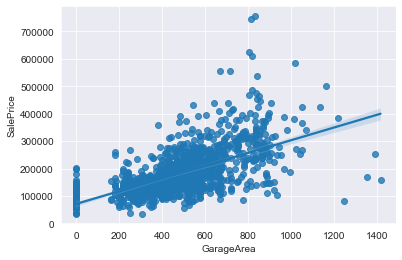

In [86]:
# Plot of sale price by garage area
sns.regplot(x = "GarageArea", y = "SalePrice", data = df)
plt.show()

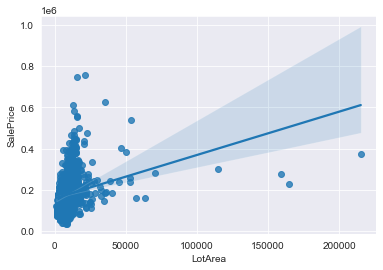

In [87]:
# Plot of sale price by lotarea
sns.regplot(x = "LotArea", y = "SalePrice", data = df)
plt.show()

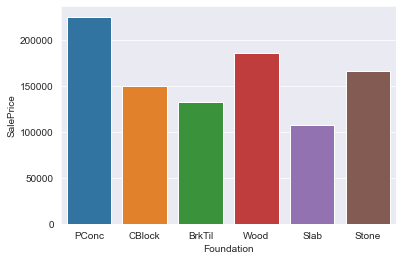

In [88]:
# Plot of Sale price by house foundation
sns.barplot(x = "Foundation", y = "SalePrice", data = df, ci = None)
plt.show()

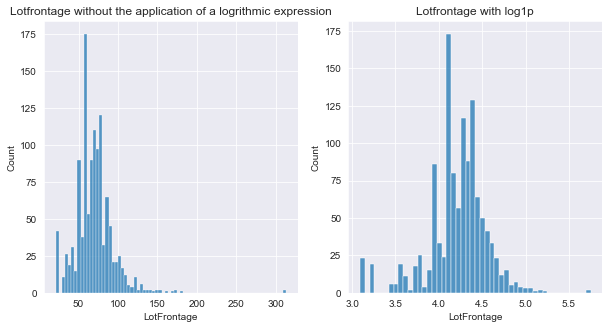

In [89]:
# Comparison of lotfrontage area with and without logrithmic exppression
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(df.LotFrontage)
plt.title("Lotfrontage without the application of a logrithmic expression")

plt.subplot(1,2,2)
sns.histplot(df.LotFrontage.apply(np.log1p))
plt.title("Lotfrontage with log1p")
plt.show()

### Preprocessing

In [90]:
# Uning the columns from the feature importance and transform the columns for the model
features = mi_scores.index
comb4 = pd.get_dummies(comb2[features])

In [91]:
# Indexing out the train data
df2 = comb4.iloc[0:1460,]
df2

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,GarageYrBlt,MSSubClass,FullBath,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,7,1710,2003,856.0,2.0,548.0,856,2003.0,60,2,...,0,0,0,0,1,0,0,0,0,1
1,6,1262,1976,1262.0,2.0,460.0,1262,1976.0,20,2,...,0,0,0,0,1,0,0,0,0,1
2,7,1786,2001,920.0,2.0,608.0,920,2001.0,60,2,...,0,0,0,0,1,0,0,0,0,1
3,7,1717,1915,756.0,3.0,642.0,961,1998.0,70,1,...,0,0,0,0,1,0,0,0,0,1
4,8,2198,2000,1145.0,3.0,836.0,1145,2000.0,60,2,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,1999,953.0,2.0,460.0,953,1999.0,60,2,...,0,0,0,0,1,0,0,0,0,1
1456,6,2073,1978,1542.0,2.0,500.0,2073,1978.0,20,2,...,0,0,0,0,1,0,0,0,0,1
1457,7,2340,1941,1152.0,1.0,252.0,1188,1941.0,70,2,...,0,0,0,0,1,0,0,1,0,0
1458,5,1078,1950,1078.0,1.0,240.0,1078,1950.0,20,1,...,0,0,0,0,1,0,0,0,0,1


In [92]:
# Indexing out the test data
test_X = comb4.iloc[1460:,]
test_X

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,GarageYrBlt,MSSubClass,FullBath,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,5,896,1961,882.0,1.0,730.0,896,1961.0,20,1,...,0,0,0,0,1,0,0,0,0,1
1,6,1329,1958,1329.0,1.0,312.0,1329,1958.0,20,1,...,0,0,0,0,1,0,0,0,0,1
2,5,1629,1997,928.0,2.0,482.0,928,1997.0,60,2,...,0,0,0,0,1,0,0,0,0,1
3,6,1604,1998,926.0,2.0,470.0,926,1998.0,60,2,...,0,0,0,0,1,0,0,0,0,1
4,8,1280,1992,1280.0,2.0,506.0,1280,1992.0,120,2,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,1970,546.0,0.0,0.0,546,1979.0,160,1,...,0,0,0,0,1,0,0,0,0,1
1455,4,1092,1970,546.0,1.0,286.0,546,1970.0,160,1,...,0,0,0,0,1,0,0,0,0,1
1456,5,1224,1960,1224.0,2.0,576.0,1224,1960.0,20,1,...,0,0,0,0,1,0,0,0,0,1
1457,5,970,1992,912.0,0.0,0.0,970,1979.0,85,1,...,0,0,0,0,1,0,0,0,0,1


In [93]:
# Creating X and y 
X = df2
y = df.SalePrice.values
print(X.shape, "\n", test_X.shape, "\n", y.shape)

(1460, 197) 
 (1459, 197) 
 (1460,)


In [94]:
# Plitting the data with test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 67)

### Building the models
In this particular notebook, there are certain things being put into practice after looking at how some others built their models. the train_test_split fuction is being applied in order to get a better result. It is importtant to note that this particular notebook is as a result of earlier analysis done in previous notebooks

#### Linear Regression (Model 1)

In [95]:
score = {}

In [96]:
L = LinearRegression()

In [97]:
L.fit(X_train, y_train)

LinearRegression()

In [98]:
l_predict = L.predict(X_test)

In [99]:
L_rmse = mean_squared_error(y_test, l_predict, squared = False)
score["linear_score"] = L.score(X_test, y_test)
print("accuracy for Linear regression:", score["linear_score"])
print("rmse for Linear regression:", L_rmse)

accuracy for Linear regression: 0.8821507445580786
rmse for Linear regression: 27525.687819715313


#### Random Forest (model 2)

In [100]:
def get_rmse(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(model.score(X_test, y_test))
    return(rmse)

In [101]:
for max_leaf_nodes in[50, 100, 200, 1000, 2000, 5000]:
    best_rmse = get_rmse(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Root Square Error:  %d" %(max_leaf_nodes, best_rmse))

0.8641945708570741
Max leaf nodes: 50  		 Root Square Error:  29548
0.8752183926433459
Max leaf nodes: 100  		 Root Square Error:  28323
0.8804637557854271
Max leaf nodes: 200  		 Root Square Error:  27722
0.8810266379743279
Max leaf nodes: 1000  		 Root Square Error:  27656
0.8810266379743279
Max leaf nodes: 2000  		 Root Square Error:  27656
0.8810266379743279
Max leaf nodes: 5000  		 Root Square Error:  27656


In [102]:
RF = RandomForestRegressor(max_leaf_nodes=1000, random_state=50)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [103]:
score["RF"] = RF.score(X_test, y_test)

#### Ridge (model 3)

In [104]:
R = Ridge(alpha=45, max_iter=4000)
R.fit(X_train, y_train)

Ridge(alpha=45, max_iter=4000)

In [105]:
r_predict = R.predict(X_test)
R_rmse = mean_squared_error(y_test, r_predict, squared = False)
print("rmse for Ridge:", R_rmse)
score["Ridge"] = R.score(X_test, y_test)
print("accuracy for Ridge:", score["Ridge"])

rmse for Ridge: 27248.699092040464
accuracy for Ridge: 0.8845106255573759


In [106]:
Rf = RandomForestRegressor(max_leaf_nodes=5000, random_state=0)
Rf.fit(X_train, y_train)
Rf_pred = Rf.predict(test_X)

In [107]:
#df_test["SalePrice"] = Rf_pred
#df_test["SalePrice"] = df_test["SalePrice"].round()
#submission = df_test[["Id", "SalePrice"]]
#submission.set_index("Id", inplace = True)
#submission.to_csv("Submission_11.csv") #Best so far

#### Decision tree (model 4)

In [108]:
def get_rmse_des(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=50)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mse = mean_squared_error(y_test, preds_val)
    rmse = np.sqrt(mse)
    print(model.score(X_test, y_test))
    return(rmse)

In [109]:
for max_leaf_nodes in[50, 150, 200, 250, 350, 450]:
    best_rmse = get_rmse_des(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Root Square Error:  %d" %(max_leaf_nodes, best_rmse))

0.8057156755607138
Max leaf nodes: 50  		 Root Square Error:  35342
0.8314389612367636
Max leaf nodes: 150  		 Root Square Error:  32919
0.8347017591663677
Max leaf nodes: 200  		 Root Square Error:  32599
0.8338638607044662
Max leaf nodes: 250  		 Root Square Error:  32681
0.8300946481226679
Max leaf nodes: 350  		 Root Square Error:  33050
0.829495553484533
Max leaf nodes: 450  		 Root Square Error:  33108


In [110]:
DT = DecisionTreeRegressor(max_leaf_nodes=450, random_state=25)
DT.fit(X_train, y_train)
y_pred = DT.predict(test_X)

In [111]:
score["DT"] = DT.score(X_test, y_test)

#### Xgboost Model (5)

In [112]:
Xgb = XGBRegressor(learning_rate = 0.3, max_depth= 5)
Xgb.fit(X_train, y_train)
xgb_predict = Xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error((y_test),(xgb_predict)))
#rmse_score['XGBoost'] = rmse
print("rsme for XGBRegression:", rmse)
score["Xgb"] = Xgb.score(X_test, y_test)
print("accuracy for XGBRegression:", score["Xgb"])

rsme for XGBRegression: 26449.72003893295
accuracy for XGBRegression: 0.8911840289351924


In [113]:
my_xgb_predict = Xgb.predict(test_X)

In [114]:
#df_test["SalePrice"] = my_xgb_predict
#df_test["SalePrice"] = df_test["SalePrice"].round()
#submission = df_test[["Id", "SalePrice"]]
#submission.set_index("Id", inplace = True)
#submission.to_csv("ames_submission/Submission_29.csv")

#### Catboost regression using gridsearch

In [115]:
from sklearn.model_selection import GridSearchCV

In [131]:
# Creating parameter dictionary
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.03,0.04],
                  'iterations'    : [100, 1000, 2000, 4000]
                 }

In [117]:
# Instatiating the Catboost regressor
CatB = CatBoostRegressor()

In [118]:
# Instatiating the grid search to find the best model
Grid_CBC = GridSearchCV(estimator=CatB, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

0:	learn: 78730.4103481	total: 153ms	remaining: 10m 12s
1:	learn: 78264.4328388	total: 160ms	remaining: 5m 19s
2:	learn: 77753.7426552	total: 165ms	remaining: 3m 40s
3:	learn: 77259.1981120	total: 171ms	remaining: 2m 50s
4:	learn: 76798.1423451	total: 194ms	remaining: 2m 35s
5:	learn: 76309.2403577	total: 200ms	remaining: 2m 12s
6:	learn: 75836.8811003	total: 205ms	remaining: 1m 56s
7:	learn: 75372.0359630	total: 210ms	remaining: 1m 45s
8:	learn: 74897.5326470	total: 216ms	remaining: 1m 35s
9:	learn: 74409.5467641	total: 222ms	remaining: 1m 28s
10:	learn: 73943.5087265	total: 228ms	remaining: 1m 22s
11:	learn: 73474.0906379	total: 233ms	remaining: 1m 17s
12:	learn: 73068.0644532	total: 239ms	remaining: 1m 13s
13:	learn: 72662.3627336	total: 244ms	remaining: 1m 9s
14:	learn: 72233.7247343	total: 250ms	remaining: 1m 6s
15:	learn: 71810.5570055	total: 257ms	remaining: 1m 4s
16:	learn: 71379.9294077	total: 266ms	remaining: 1m 2s
17:	learn: 70974.2499568	total: 274ms	remaining: 1m
18:	learn

175:	learn: 35031.7600437	total: 1.25s	remaining: 27.2s
176:	learn: 34911.1167870	total: 1.26s	remaining: 27.2s
177:	learn: 34794.2158898	total: 1.26s	remaining: 27.2s
178:	learn: 34683.3117202	total: 1.27s	remaining: 27.2s
179:	learn: 34569.4987218	total: 1.28s	remaining: 27.1s
180:	learn: 34447.5489065	total: 1.28s	remaining: 27.1s
181:	learn: 34351.6784339	total: 1.29s	remaining: 27.1s
182:	learn: 34255.6855711	total: 1.3s	remaining: 27s
183:	learn: 34169.6081329	total: 1.3s	remaining: 27s
184:	learn: 34058.2181388	total: 1.31s	remaining: 27s
185:	learn: 33955.0562374	total: 1.32s	remaining: 27s
186:	learn: 33856.2715239	total: 1.32s	remaining: 27s
187:	learn: 33747.4299484	total: 1.33s	remaining: 27s
188:	learn: 33653.7861764	total: 1.34s	remaining: 27s
189:	learn: 33549.3052662	total: 1.34s	remaining: 27s
190:	learn: 33460.1185024	total: 1.35s	remaining: 26.9s
191:	learn: 33370.0473891	total: 1.35s	remaining: 26.9s
192:	learn: 33266.5892312	total: 1.36s	remaining: 26.9s
193:	learn

326:	learn: 24758.0606742	total: 2.14s	remaining: 24.1s
327:	learn: 24723.0953960	total: 2.15s	remaining: 24.1s
328:	learn: 24686.7457455	total: 2.16s	remaining: 24.1s
329:	learn: 24646.1167109	total: 2.16s	remaining: 24.1s
330:	learn: 24605.0154119	total: 2.17s	remaining: 24s
331:	learn: 24568.5726721	total: 2.17s	remaining: 24s
332:	learn: 24524.0935793	total: 2.18s	remaining: 24s
333:	learn: 24490.7722196	total: 2.19s	remaining: 24s
334:	learn: 24447.1329280	total: 2.19s	remaining: 24s
335:	learn: 24405.7981930	total: 2.2s	remaining: 24s
336:	learn: 24373.2289915	total: 2.2s	remaining: 24s
337:	learn: 24331.4313862	total: 2.21s	remaining: 23.9s
338:	learn: 24306.2979049	total: 2.21s	remaining: 23.9s
339:	learn: 24266.2051412	total: 2.22s	remaining: 23.9s
340:	learn: 24235.9195313	total: 2.23s	remaining: 23.9s
341:	learn: 24189.9461037	total: 2.23s	remaining: 23.9s
342:	learn: 24158.6793758	total: 2.24s	remaining: 23.8s
343:	learn: 24123.5478046	total: 2.24s	remaining: 23.8s
344:	lea

496:	learn: 20316.3688921	total: 3.23s	remaining: 22.8s
497:	learn: 20295.4743435	total: 3.24s	remaining: 22.8s
498:	learn: 20272.6545470	total: 3.25s	remaining: 22.8s
499:	learn: 20252.0523905	total: 3.25s	remaining: 22.8s
500:	learn: 20235.9571109	total: 3.26s	remaining: 22.8s
501:	learn: 20222.6087013	total: 3.27s	remaining: 22.8s
502:	learn: 20208.3614237	total: 3.28s	remaining: 22.8s
503:	learn: 20185.9693053	total: 3.29s	remaining: 22.8s
504:	learn: 20164.6553227	total: 3.29s	remaining: 22.8s
505:	learn: 20142.9041086	total: 3.29s	remaining: 22.8s
506:	learn: 20125.4802784	total: 3.3s	remaining: 22.8s
507:	learn: 20101.8119199	total: 3.31s	remaining: 22.8s
508:	learn: 20078.5489586	total: 3.32s	remaining: 22.8s
509:	learn: 20065.9989730	total: 3.32s	remaining: 22.7s
510:	learn: 20045.0203453	total: 3.33s	remaining: 22.7s
511:	learn: 20025.1206934	total: 3.33s	remaining: 22.7s
512:	learn: 20012.8256564	total: 3.34s	remaining: 22.7s
513:	learn: 19999.0683023	total: 3.35s	remaining:

645:	learn: 18089.2539428	total: 4.13s	remaining: 21.4s
646:	learn: 18080.5816742	total: 4.13s	remaining: 21.4s
647:	learn: 18069.6320037	total: 4.14s	remaining: 21.4s
648:	learn: 18058.6764278	total: 4.15s	remaining: 21.4s
649:	learn: 18045.8787212	total: 4.15s	remaining: 21.4s
650:	learn: 18030.3817967	total: 4.16s	remaining: 21.4s
651:	learn: 18020.7210275	total: 4.17s	remaining: 21.4s
652:	learn: 18006.4241620	total: 4.17s	remaining: 21.4s
653:	learn: 17992.8906055	total: 4.18s	remaining: 21.4s
654:	learn: 17985.0222905	total: 4.19s	remaining: 21.4s
655:	learn: 17977.8094352	total: 4.2s	remaining: 21.4s
656:	learn: 17967.1417270	total: 4.2s	remaining: 21.4s
657:	learn: 17956.1978573	total: 4.21s	remaining: 21.4s
658:	learn: 17948.1006224	total: 4.21s	remaining: 21.4s
659:	learn: 17938.2989764	total: 4.22s	remaining: 21.4s
660:	learn: 17929.4997411	total: 4.22s	remaining: 21.3s
661:	learn: 17916.4013585	total: 4.23s	remaining: 21.3s
662:	learn: 17907.2986279	total: 4.24s	remaining: 

807:	learn: 16514.2567905	total: 5.25s	remaining: 20.7s
808:	learn: 16505.3741393	total: 5.26s	remaining: 20.7s
809:	learn: 16497.2631244	total: 5.27s	remaining: 20.7s
810:	learn: 16488.3750000	total: 5.27s	remaining: 20.7s
811:	learn: 16480.7518735	total: 5.28s	remaining: 20.7s
812:	learn: 16473.2993544	total: 5.29s	remaining: 20.7s
813:	learn: 16460.3618578	total: 5.3s	remaining: 20.7s
814:	learn: 16453.8033620	total: 5.31s	remaining: 20.7s
815:	learn: 16444.8308703	total: 5.31s	remaining: 20.7s
816:	learn: 16438.7714825	total: 5.32s	remaining: 20.7s
817:	learn: 16433.0414143	total: 5.33s	remaining: 20.7s
818:	learn: 16427.3912215	total: 5.33s	remaining: 20.7s
819:	learn: 16420.4146469	total: 5.34s	remaining: 20.7s
820:	learn: 16417.6214802	total: 5.34s	remaining: 20.7s
821:	learn: 16406.7893917	total: 5.35s	remaining: 20.7s
822:	learn: 16398.5934014	total: 5.36s	remaining: 20.7s
823:	learn: 16387.9746351	total: 5.36s	remaining: 20.7s
824:	learn: 16377.4863756	total: 5.37s	remaining:

973:	learn: 15240.4937907	total: 6.32s	remaining: 19.6s
974:	learn: 15237.2746189	total: 6.33s	remaining: 19.6s
975:	learn: 15231.6020859	total: 6.34s	remaining: 19.6s
976:	learn: 15224.3438246	total: 6.34s	remaining: 19.6s
977:	learn: 15214.7070558	total: 6.35s	remaining: 19.6s
978:	learn: 15210.2613360	total: 6.36s	remaining: 19.6s
979:	learn: 15203.9672606	total: 6.36s	remaining: 19.6s
980:	learn: 15197.1148770	total: 6.37s	remaining: 19.6s
981:	learn: 15187.7577977	total: 6.38s	remaining: 19.6s
982:	learn: 15180.6796949	total: 6.38s	remaining: 19.6s
983:	learn: 15172.9109732	total: 6.39s	remaining: 19.6s
984:	learn: 15163.9340391	total: 6.4s	remaining: 19.6s
985:	learn: 15156.3339616	total: 6.41s	remaining: 19.6s
986:	learn: 15150.2918439	total: 6.42s	remaining: 19.6s
987:	learn: 15139.3750165	total: 6.42s	remaining: 19.6s
988:	learn: 15136.2347886	total: 6.43s	remaining: 19.6s
989:	learn: 15133.7240974	total: 6.44s	remaining: 19.6s
990:	learn: 15125.7890526	total: 6.45s	remaining:

1135:	learn: 14168.4431094	total: 7.35s	remaining: 18.5s
1136:	learn: 14166.6024174	total: 7.36s	remaining: 18.5s
1137:	learn: 14160.1688112	total: 7.37s	remaining: 18.5s
1138:	learn: 14152.6391091	total: 7.38s	remaining: 18.5s
1139:	learn: 14146.6416844	total: 7.38s	remaining: 18.5s
1140:	learn: 14141.5699471	total: 7.39s	remaining: 18.5s
1141:	learn: 14136.8708885	total: 7.39s	remaining: 18.5s
1142:	learn: 14133.9411379	total: 7.4s	remaining: 18.5s
1143:	learn: 14128.2287325	total: 7.4s	remaining: 18.5s
1144:	learn: 14125.7278371	total: 7.41s	remaining: 18.5s
1145:	learn: 14118.2597876	total: 7.41s	remaining: 18.5s
1146:	learn: 14115.1638898	total: 7.42s	remaining: 18.5s
1147:	learn: 14113.6644039	total: 7.43s	remaining: 18.4s
1148:	learn: 14105.8399652	total: 7.43s	remaining: 18.4s
1149:	learn: 14100.6219109	total: 7.44s	remaining: 18.4s
1150:	learn: 14094.3247515	total: 7.44s	remaining: 18.4s
1151:	learn: 14086.4465666	total: 7.45s	remaining: 18.4s
1152:	learn: 14079.4619125	total:

1282:	learn: 13403.2437913	total: 8.27s	remaining: 17.5s
1283:	learn: 13399.4488243	total: 8.27s	remaining: 17.5s
1284:	learn: 13391.7589598	total: 8.28s	remaining: 17.5s
1285:	learn: 13391.0378374	total: 8.29s	remaining: 17.5s
1286:	learn: 13386.6049123	total: 8.29s	remaining: 17.5s
1287:	learn: 13380.5354020	total: 8.3s	remaining: 17.5s
1288:	learn: 13374.4081434	total: 8.31s	remaining: 17.5s
1289:	learn: 13368.9694965	total: 8.31s	remaining: 17.5s
1290:	learn: 13361.7558511	total: 8.32s	remaining: 17.5s
1291:	learn: 13355.8914316	total: 8.32s	remaining: 17.4s
1292:	learn: 13351.6144116	total: 8.33s	remaining: 17.4s
1293:	learn: 13346.1651252	total: 8.33s	remaining: 17.4s
1294:	learn: 13342.6030253	total: 8.34s	remaining: 17.4s
1295:	learn: 13334.6126866	total: 8.35s	remaining: 17.4s
1296:	learn: 13330.2357931	total: 8.36s	remaining: 17.4s
1297:	learn: 13325.1820166	total: 8.36s	remaining: 17.4s
1298:	learn: 13320.2043617	total: 8.37s	remaining: 17.4s
1299:	learn: 13314.3577568	total

1447:	learn: 12656.5187308	total: 9.28s	remaining: 16.4s
1448:	learn: 12651.4152062	total: 9.29s	remaining: 16.4s
1449:	learn: 12650.8945463	total: 9.3s	remaining: 16.4s
1450:	learn: 12646.3233396	total: 9.3s	remaining: 16.3s
1451:	learn: 12643.1172991	total: 9.31s	remaining: 16.3s
1452:	learn: 12641.1712679	total: 9.32s	remaining: 16.3s
1453:	learn: 12635.3410201	total: 9.32s	remaining: 16.3s
1454:	learn: 12631.9640632	total: 9.33s	remaining: 16.3s
1455:	learn: 12627.7767851	total: 9.33s	remaining: 16.3s
1456:	learn: 12622.7897901	total: 9.34s	remaining: 16.3s
1457:	learn: 12616.7829013	total: 9.35s	remaining: 16.3s
1458:	learn: 12612.7106464	total: 9.35s	remaining: 16.3s
1459:	learn: 12606.9912282	total: 9.36s	remaining: 16.3s
1460:	learn: 12602.8149227	total: 9.36s	remaining: 16.3s
1461:	learn: 12602.3364562	total: 9.37s	remaining: 16.3s
1462:	learn: 12595.1908169	total: 9.37s	remaining: 16.3s
1463:	learn: 12590.9761817	total: 9.38s	remaining: 16.2s
1464:	learn: 12584.7089471	total:

1621:	learn: 11933.1278146	total: 10.3s	remaining: 15.1s
1622:	learn: 11928.1840690	total: 10.3s	remaining: 15.1s
1623:	learn: 11923.4280504	total: 10.3s	remaining: 15.1s
1624:	learn: 11920.6765164	total: 10.3s	remaining: 15.1s
1625:	learn: 11917.1075411	total: 10.4s	remaining: 15.1s
1626:	learn: 11911.8045823	total: 10.4s	remaining: 15.1s
1627:	learn: 11907.4126943	total: 10.4s	remaining: 15.1s
1628:	learn: 11902.9701613	total: 10.4s	remaining: 15.1s
1629:	learn: 11895.4692900	total: 10.4s	remaining: 15.1s
1630:	learn: 11893.6759433	total: 10.4s	remaining: 15.1s
1631:	learn: 11890.6215317	total: 10.4s	remaining: 15.1s
1632:	learn: 11885.9695359	total: 10.4s	remaining: 15.1s
1633:	learn: 11883.1649434	total: 10.4s	remaining: 15.1s
1634:	learn: 11877.4523179	total: 10.4s	remaining: 15s
1635:	learn: 11871.1585972	total: 10.4s	remaining: 15s
1636:	learn: 11866.7839102	total: 10.4s	remaining: 15s
1637:	learn: 11861.4780256	total: 10.4s	remaining: 15s
1638:	learn: 11861.1012049	total: 10.4s

1775:	learn: 11319.6435958	total: 11.2s	remaining: 14.1s
1776:	learn: 11313.6443095	total: 11.2s	remaining: 14s
1777:	learn: 11313.3300919	total: 11.2s	remaining: 14s
1778:	learn: 11311.8886830	total: 11.2s	remaining: 14s
1779:	learn: 11305.4070492	total: 11.2s	remaining: 14s
1780:	learn: 11301.1664414	total: 11.3s	remaining: 14s
1781:	learn: 11292.9332389	total: 11.3s	remaining: 14s
1782:	learn: 11288.5831821	total: 11.3s	remaining: 14s
1783:	learn: 11284.8905392	total: 11.3s	remaining: 14s
1784:	learn: 11282.4578639	total: 11.3s	remaining: 14s
1785:	learn: 11280.3011718	total: 11.3s	remaining: 14s
1786:	learn: 11277.4060639	total: 11.3s	remaining: 14s
1787:	learn: 11273.5029196	total: 11.3s	remaining: 14s
1788:	learn: 11271.4844996	total: 11.3s	remaining: 14s
1789:	learn: 11269.8152312	total: 11.3s	remaining: 14s
1790:	learn: 11267.9162257	total: 11.3s	remaining: 13.9s
1791:	learn: 11265.1972763	total: 11.3s	remaining: 13.9s
1792:	learn: 11262.7514569	total: 11.3s	remaining: 13.9s
17

1929:	learn: 10793.3928395	total: 12.1s	remaining: 13s
1930:	learn: 10789.2692479	total: 12.1s	remaining: 13s
1931:	learn: 10786.7070505	total: 12.1s	remaining: 13s
1932:	learn: 10783.1531906	total: 12.1s	remaining: 13s
1933:	learn: 10782.0905035	total: 12.1s	remaining: 13s
1934:	learn: 10778.4880072	total: 12.2s	remaining: 13s
1935:	learn: 10773.9443124	total: 12.2s	remaining: 13s
1936:	learn: 10770.9941453	total: 12.2s	remaining: 13s
1937:	learn: 10767.8840370	total: 12.2s	remaining: 12.9s
1938:	learn: 10764.4142393	total: 12.2s	remaining: 12.9s
1939:	learn: 10760.0190563	total: 12.2s	remaining: 12.9s
1940:	learn: 10757.1471311	total: 12.2s	remaining: 12.9s
1941:	learn: 10753.0483541	total: 12.2s	remaining: 12.9s
1942:	learn: 10749.9119715	total: 12.2s	remaining: 12.9s
1943:	learn: 10748.1331822	total: 12.2s	remaining: 12.9s
1944:	learn: 10745.7864414	total: 12.2s	remaining: 12.9s
1945:	learn: 10742.2786983	total: 12.2s	remaining: 12.9s
1946:	learn: 10738.8844562	total: 12.2s	remaini

2079:	learn: 10315.3274877	total: 13.2s	remaining: 12.2s
2080:	learn: 10312.2428741	total: 13.2s	remaining: 12.2s
2081:	learn: 10308.7255790	total: 13.2s	remaining: 12.2s
2082:	learn: 10304.1513179	total: 13.2s	remaining: 12.2s
2083:	learn: 10299.7533072	total: 13.2s	remaining: 12.2s
2084:	learn: 10298.8054696	total: 13.3s	remaining: 12.2s
2085:	learn: 10296.3827257	total: 13.3s	remaining: 12.2s
2086:	learn: 10296.1469904	total: 13.3s	remaining: 12.2s
2087:	learn: 10293.1351515	total: 13.3s	remaining: 12.2s
2088:	learn: 10286.9459990	total: 13.3s	remaining: 12.1s
2089:	learn: 10286.7232822	total: 13.3s	remaining: 12.1s
2090:	learn: 10283.9005265	total: 13.3s	remaining: 12.1s
2091:	learn: 10280.8786773	total: 13.3s	remaining: 12.1s
2092:	learn: 10277.5203432	total: 13.3s	remaining: 12.1s
2093:	learn: 10274.9049498	total: 13.3s	remaining: 12.1s
2094:	learn: 10271.5450147	total: 13.3s	remaining: 12.1s
2095:	learn: 10270.0960420	total: 13.3s	remaining: 12.1s
2096:	learn: 10269.4291135	tota

2235:	learn: 9859.4731757	total: 14.3s	remaining: 11.3s
2236:	learn: 9858.6346281	total: 14.3s	remaining: 11.3s
2237:	learn: 9855.5592297	total: 14.3s	remaining: 11.3s
2238:	learn: 9854.4605645	total: 14.3s	remaining: 11.3s
2239:	learn: 9851.1786913	total: 14.3s	remaining: 11.2s
2240:	learn: 9849.3390444	total: 14.3s	remaining: 11.2s
2241:	learn: 9847.4991361	total: 14.3s	remaining: 11.2s
2242:	learn: 9844.6128875	total: 14.3s	remaining: 11.2s
2243:	learn: 9841.9654780	total: 14.3s	remaining: 11.2s
2244:	learn: 9838.7623893	total: 14.3s	remaining: 11.2s
2245:	learn: 9835.1484487	total: 14.3s	remaining: 11.2s
2246:	learn: 9831.0460026	total: 14.4s	remaining: 11.2s
2247:	learn: 9827.4872110	total: 14.4s	remaining: 11.2s
2248:	learn: 9824.3707916	total: 14.4s	remaining: 11.2s
2249:	learn: 9821.2192430	total: 14.4s	remaining: 11.2s
2250:	learn: 9819.4786744	total: 14.4s	remaining: 11.2s
2251:	learn: 9817.3487545	total: 14.4s	remaining: 11.2s
2252:	learn: 9815.4458969	total: 14.4s	remaining

2389:	learn: 9475.7237046	total: 15.2s	remaining: 10.2s
2390:	learn: 9473.1405267	total: 15.2s	remaining: 10.2s
2391:	learn: 9470.5566839	total: 15.2s	remaining: 10.2s
2392:	learn: 9470.3190637	total: 15.2s	remaining: 10.2s
2393:	learn: 9469.3438790	total: 15.2s	remaining: 10.2s
2394:	learn: 9467.5801197	total: 15.2s	remaining: 10.2s
2395:	learn: 9464.3830126	total: 15.2s	remaining: 10.2s
2396:	learn: 9461.0386579	total: 15.2s	remaining: 10.2s
2397:	learn: 9458.0946032	total: 15.2s	remaining: 10.2s
2398:	learn: 9454.4861536	total: 15.2s	remaining: 10.2s
2399:	learn: 9452.1048173	total: 15.2s	remaining: 10.2s
2400:	learn: 9450.6469048	total: 15.2s	remaining: 10.2s
2401:	learn: 9449.4586527	total: 15.3s	remaining: 10.1s
2402:	learn: 9445.3579950	total: 15.3s	remaining: 10.1s
2403:	learn: 9444.4002084	total: 15.3s	remaining: 10.1s
2404:	learn: 9441.1781944	total: 15.3s	remaining: 10.1s
2405:	learn: 9439.7101435	total: 15.3s	remaining: 10.1s
2406:	learn: 9436.4232324	total: 15.3s	remaining

2543:	learn: 9103.9368529	total: 16.1s	remaining: 9.2s
2544:	learn: 9100.6337207	total: 16.1s	remaining: 9.2s
2545:	learn: 9100.2433391	total: 16.1s	remaining: 9.19s
2546:	learn: 9096.9190289	total: 16.1s	remaining: 9.18s
2547:	learn: 9092.8095881	total: 16.1s	remaining: 9.18s
2548:	learn: 9089.6749558	total: 16.1s	remaining: 9.17s
2549:	learn: 9086.0325486	total: 16.1s	remaining: 9.16s
2550:	learn: 9082.5302945	total: 16.1s	remaining: 9.16s
2551:	learn: 9079.9476822	total: 16.1s	remaining: 9.15s
2552:	learn: 9078.2054457	total: 16.1s	remaining: 9.14s
2553:	learn: 9075.5220796	total: 16.1s	remaining: 9.14s
2554:	learn: 9073.4058155	total: 16.1s	remaining: 9.13s
2555:	learn: 9071.4131736	total: 16.1s	remaining: 9.12s
2556:	learn: 9071.0433133	total: 16.2s	remaining: 9.12s
2557:	learn: 9067.9257980	total: 16.2s	remaining: 9.11s
2558:	learn: 9067.7237505	total: 16.2s	remaining: 9.1s
2559:	learn: 9063.4263489	total: 16.2s	remaining: 9.1s
2560:	learn: 9061.7820842	total: 16.2s	remaining: 9.

2691:	learn: 8754.0439483	total: 17s	remaining: 8.24s
2692:	learn: 8753.8711962	total: 17s	remaining: 8.24s
2693:	learn: 8752.5471853	total: 17s	remaining: 8.23s
2694:	learn: 8752.1264519	total: 17s	remaining: 8.23s
2695:	learn: 8748.1970974	total: 17s	remaining: 8.22s
2696:	learn: 8745.7774637	total: 17s	remaining: 8.21s
2697:	learn: 8743.2885904	total: 17s	remaining: 8.21s
2698:	learn: 8743.1087663	total: 17s	remaining: 8.2s
2699:	learn: 8739.4007282	total: 17s	remaining: 8.19s
2700:	learn: 8736.1001703	total: 17s	remaining: 8.19s
2701:	learn: 8733.2294533	total: 17s	remaining: 8.18s
2702:	learn: 8730.4813657	total: 17s	remaining: 8.17s
2703:	learn: 8726.5095307	total: 17s	remaining: 8.17s
2704:	learn: 8726.0418180	total: 17s	remaining: 8.16s
2705:	learn: 8724.0717488	total: 17.1s	remaining: 8.15s
2706:	learn: 8721.8098505	total: 17.1s	remaining: 8.15s
2707:	learn: 8719.9740758	total: 17.1s	remaining: 8.14s
2708:	learn: 8716.7360515	total: 17.1s	remaining: 8.13s
2709:	learn: 8716.574

2847:	learn: 8395.4711078	total: 17.9s	remaining: 7.22s
2848:	learn: 8394.2059988	total: 17.9s	remaining: 7.22s
2849:	learn: 8391.1113789	total: 17.9s	remaining: 7.21s
2850:	learn: 8388.7386165	total: 17.9s	remaining: 7.21s
2851:	learn: 8386.5568857	total: 17.9s	remaining: 7.2s
2852:	learn: 8383.4354165	total: 17.9s	remaining: 7.19s
2853:	learn: 8380.9154101	total: 17.9s	remaining: 7.19s
2854:	learn: 8377.9440454	total: 17.9s	remaining: 7.18s
2855:	learn: 8375.5542753	total: 17.9s	remaining: 7.17s
2856:	learn: 8372.6840880	total: 17.9s	remaining: 7.17s
2857:	learn: 8369.4028322	total: 17.9s	remaining: 7.16s
2858:	learn: 8367.8515067	total: 17.9s	remaining: 7.16s
2859:	learn: 8366.1747239	total: 17.9s	remaining: 7.15s
2860:	learn: 8364.4763794	total: 17.9s	remaining: 7.14s
2861:	learn: 8362.0439720	total: 17.9s	remaining: 7.13s
2862:	learn: 8360.4199163	total: 18s	remaining: 7.13s
2863:	learn: 8357.6865422	total: 18s	remaining: 7.12s
2864:	learn: 8356.7129451	total: 18s	remaining: 7.12s

3015:	learn: 8040.0352882	total: 18.9s	remaining: 6.15s
3016:	learn: 8039.8698990	total: 18.9s	remaining: 6.14s
3017:	learn: 8036.1613723	total: 18.9s	remaining: 6.14s
3018:	learn: 8035.1587571	total: 18.9s	remaining: 6.13s
3019:	learn: 8033.4117732	total: 18.9s	remaining: 6.13s
3020:	learn: 8030.7141145	total: 18.9s	remaining: 6.12s
3021:	learn: 8028.2233428	total: 18.9s	remaining: 6.11s
3022:	learn: 8025.5413418	total: 18.9s	remaining: 6.11s
3023:	learn: 8025.2514174	total: 18.9s	remaining: 6.1s
3024:	learn: 8023.4979797	total: 18.9s	remaining: 6.09s
3025:	learn: 8021.2660116	total: 18.9s	remaining: 6.09s
3026:	learn: 8018.6740414	total: 18.9s	remaining: 6.08s
3027:	learn: 8015.3458007	total: 18.9s	remaining: 6.07s
3028:	learn: 8011.7201987	total: 18.9s	remaining: 6.07s
3029:	learn: 8011.6233605	total: 18.9s	remaining: 6.06s
3030:	learn: 8009.7667365	total: 18.9s	remaining: 6.05s
3031:	learn: 8006.2526589	total: 18.9s	remaining: 6.05s
3032:	learn: 8005.5765484	total: 18.9s	remaining:

3172:	learn: 7719.0741216	total: 19.8s	remaining: 5.15s
3173:	learn: 7718.7810890	total: 19.8s	remaining: 5.14s
3174:	learn: 7718.5412442	total: 19.8s	remaining: 5.13s
3175:	learn: 7715.4117915	total: 19.8s	remaining: 5.13s
3176:	learn: 7714.4926624	total: 19.8s	remaining: 5.12s
3177:	learn: 7710.9677272	total: 19.8s	remaining: 5.12s
3178:	learn: 7708.0120678	total: 19.8s	remaining: 5.11s
3179:	learn: 7706.2433694	total: 19.8s	remaining: 5.1s
3180:	learn: 7704.9896826	total: 19.8s	remaining: 5.1s
3181:	learn: 7703.4714879	total: 19.8s	remaining: 5.09s
3182:	learn: 7702.3101735	total: 19.8s	remaining: 5.08s
3183:	learn: 7702.2243853	total: 19.8s	remaining: 5.08s
3184:	learn: 7700.0694136	total: 19.8s	remaining: 5.07s
3185:	learn: 7696.5085213	total: 19.8s	remaining: 5.07s
3186:	learn: 7692.8837738	total: 19.8s	remaining: 5.06s
3187:	learn: 7691.3812908	total: 19.8s	remaining: 5.05s
3188:	learn: 7687.8302738	total: 19.8s	remaining: 5.05s
3189:	learn: 7686.1167468	total: 19.8s	remaining: 

3331:	learn: 7404.6584308	total: 20.7s	remaining: 4.14s
3332:	learn: 7402.5025733	total: 20.7s	remaining: 4.13s
3333:	learn: 7400.1819824	total: 20.7s	remaining: 4.13s
3334:	learn: 7400.0905681	total: 20.7s	remaining: 4.12s
3335:	learn: 7399.0320468	total: 20.7s	remaining: 4.12s
3336:	learn: 7397.6969005	total: 20.7s	remaining: 4.11s
3337:	learn: 7396.4241062	total: 20.7s	remaining: 4.1s
3338:	learn: 7392.9588935	total: 20.7s	remaining: 4.1s
3339:	learn: 7390.6664258	total: 20.7s	remaining: 4.09s
3340:	learn: 7390.3090097	total: 20.7s	remaining: 4.08s
3341:	learn: 7388.5636840	total: 20.7s	remaining: 4.08s
3342:	learn: 7388.2788915	total: 20.7s	remaining: 4.07s
3343:	learn: 7386.2891282	total: 20.7s	remaining: 4.07s
3344:	learn: 7384.2926295	total: 20.7s	remaining: 4.06s
3345:	learn: 7382.2352938	total: 20.7s	remaining: 4.05s
3346:	learn: 7381.2350609	total: 20.7s	remaining: 4.05s
3347:	learn: 7377.9900246	total: 20.8s	remaining: 4.04s
3348:	learn: 7377.7707701	total: 20.8s	remaining: 

3488:	learn: 7123.9874608	total: 21.6s	remaining: 3.16s
3489:	learn: 7121.3175262	total: 21.6s	remaining: 3.15s
3490:	learn: 7120.8505736	total: 21.6s	remaining: 3.14s
3491:	learn: 7118.2247394	total: 21.6s	remaining: 3.14s
3492:	learn: 7116.0505840	total: 21.6s	remaining: 3.13s
3493:	learn: 7113.8446391	total: 21.6s	remaining: 3.13s
3494:	learn: 7112.5175550	total: 21.6s	remaining: 3.12s
3495:	learn: 7111.2644350	total: 21.6s	remaining: 3.11s
3496:	learn: 7109.3001880	total: 21.6s	remaining: 3.11s
3497:	learn: 7107.5067116	total: 21.6s	remaining: 3.1s
3498:	learn: 7105.1347295	total: 21.6s	remaining: 3.09s
3499:	learn: 7103.5884043	total: 21.6s	remaining: 3.09s
3500:	learn: 7101.5367562	total: 21.6s	remaining: 3.08s
3501:	learn: 7099.8139946	total: 21.6s	remaining: 3.08s
3502:	learn: 7097.3926643	total: 21.6s	remaining: 3.07s
3503:	learn: 7094.3745670	total: 21.6s	remaining: 3.06s
3504:	learn: 7092.8864836	total: 21.7s	remaining: 3.06s
3505:	learn: 7092.4672881	total: 21.7s	remaining:

3639:	learn: 6869.5409939	total: 22.4s	remaining: 2.22s
3640:	learn: 6868.0623388	total: 22.4s	remaining: 2.21s
3641:	learn: 6866.3460297	total: 22.4s	remaining: 2.21s
3642:	learn: 6864.2972098	total: 22.4s	remaining: 2.2s
3643:	learn: 6861.7453610	total: 22.4s	remaining: 2.19s
3644:	learn: 6861.5927635	total: 22.5s	remaining: 2.19s
3645:	learn: 6861.3906917	total: 22.5s	remaining: 2.18s
3646:	learn: 6860.1193970	total: 22.5s	remaining: 2.17s
3647:	learn: 6857.7021097	total: 22.5s	remaining: 2.17s
3648:	learn: 6855.9358712	total: 22.5s	remaining: 2.16s
3649:	learn: 6854.9645891	total: 22.5s	remaining: 2.15s
3650:	learn: 6851.8168348	total: 22.5s	remaining: 2.15s
3651:	learn: 6850.9677071	total: 22.5s	remaining: 2.14s
3652:	learn: 6848.9586903	total: 22.5s	remaining: 2.14s
3653:	learn: 6846.3722920	total: 22.5s	remaining: 2.13s
3654:	learn: 6843.0613773	total: 22.5s	remaining: 2.12s
3655:	learn: 6841.7940121	total: 22.5s	remaining: 2.12s
3656:	learn: 6839.6614300	total: 22.5s	remaining:

3795:	learn: 6609.0859819	total: 23.3s	remaining: 1.25s
3796:	learn: 6607.3382985	total: 23.3s	remaining: 1.25s
3797:	learn: 6607.1702055	total: 23.3s	remaining: 1.24s
3798:	learn: 6605.3647252	total: 23.3s	remaining: 1.23s
3799:	learn: 6604.5195463	total: 23.3s	remaining: 1.23s
3800:	learn: 6602.1560804	total: 23.3s	remaining: 1.22s
3801:	learn: 6600.7358314	total: 23.3s	remaining: 1.22s
3802:	learn: 6597.4476524	total: 23.4s	remaining: 1.21s
3803:	learn: 6595.9914455	total: 23.4s	remaining: 1.2s
3804:	learn: 6594.1976189	total: 23.4s	remaining: 1.2s
3805:	learn: 6594.1222000	total: 23.4s	remaining: 1.19s
3806:	learn: 6591.4117826	total: 23.4s	remaining: 1.19s
3807:	learn: 6591.2915146	total: 23.4s	remaining: 1.18s
3808:	learn: 6590.2455766	total: 23.4s	remaining: 1.17s
3809:	learn: 6590.1277390	total: 23.4s	remaining: 1.17s
3810:	learn: 6590.0068228	total: 23.4s	remaining: 1.16s
3811:	learn: 6587.7994191	total: 23.4s	remaining: 1.15s
3812:	learn: 6586.3246660	total: 23.4s	remaining: 

3952:	learn: 6383.4065117	total: 24.2s	remaining: 288ms
3953:	learn: 6381.6594236	total: 24.2s	remaining: 282ms
3954:	learn: 6381.1086510	total: 24.2s	remaining: 276ms
3955:	learn: 6381.0370063	total: 24.2s	remaining: 269ms
3956:	learn: 6380.2199564	total: 24.2s	remaining: 263ms
3957:	learn: 6378.3723255	total: 24.2s	remaining: 257ms
3958:	learn: 6377.8507772	total: 24.2s	remaining: 251ms
3959:	learn: 6375.9259251	total: 24.2s	remaining: 245ms
3960:	learn: 6374.6267071	total: 24.3s	remaining: 239ms
3961:	learn: 6372.7565471	total: 24.3s	remaining: 233ms
3962:	learn: 6370.9050937	total: 24.3s	remaining: 227ms
3963:	learn: 6369.1142240	total: 24.3s	remaining: 220ms
3964:	learn: 6367.3404647	total: 24.3s	remaining: 214ms
3965:	learn: 6365.4214686	total: 24.3s	remaining: 208ms
3966:	learn: 6363.1590538	total: 24.3s	remaining: 202ms
3967:	learn: 6361.6321059	total: 24.3s	remaining: 196ms
3968:	learn: 6360.8893409	total: 24.3s	remaining: 190ms
3969:	learn: 6359.5492345	total: 24.3s	remaining

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002C6EBCCAA00>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [100, 1000, 2000, 4000],
                         'learning_rate': [0.01, 0.03, 0.04]})

In [119]:
# Printing Grid search results
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8840746931768719

 The best parameters across ALL searched params:
 {'depth': 6, 'iterations': 4000, 'learning_rate': 0.01}


#### Catboost (model 6)

In [133]:
Cat = CatBoostRegressor(iterations=4000, learning_rate=0.01, depth=5)
Cat.fit(X_train,y_train,verbose = 0)
cat_predict = Cat.predict(X_test)
rmse = np.sqrt(mean_squared_error((y_test),(cat_predict)))
#rmse_score['CatBoost'] = rmse
print("rmse for Catboost:",rmse)
score["Cat"] = Cat.score(X_test, y_test)
print("accuracy for Catboost:", score["Cat"])

rmse for Catboost: 23698.386843391483
accuracy for Catboost: 0.9126449429161663


In [121]:
# Making prediction
my_caboost_predict = Cat.predict(test_X)

In [122]:
#swq = sorted(score.items(), key = lambda reverse= False)
score

{'linear_score': 0.8821507445580786,
 'RF': 0.8821746151527856,
 'Ridge': 0.8845106255573759,
 'DT': 0.8273925318030942,
 'Xgb': 0.8911840289351924,
 'Cat': 0.9126449429161663}

In [123]:
#df_test["SalePrice"] = my_caboost_predict
#df_test["SalePrice"] = df_test["SalePrice"].round()
#submission = df_test[["Id", "SalePrice"]]
#submission.set_index("Id", inplace = True)
#submission.to_csv("ames_submission/Submission_30.csv")

In [124]:
sort_orders = sorted(score.items(), key=lambda x: x[1], reverse=True)
numbse = []
sqat = []
for i in sort_orders:
    if i == object or float:
        sqat.append(i[1])
    else:
        numbse.append(i[0])
    print(i[0], i[1])
#sort_orders

Cat 0.9126449429161663
Xgb 0.8911840289351924
Ridge 0.8845106255573759
RF 0.8821746151527856
linear_score 0.8821507445580786
DT 0.8273925318030942


In [125]:
print(numbse)
print(sqat)

[]
[0.9126449429161663, 0.8911840289351924, 0.8845106255573759, 0.8821746151527856, 0.8821507445580786, 0.8273925318030942]


In [134]:
names = list(score.keys())
values = list(score.values())
print(names)
print(values)

['linear_score', 'RF', 'Ridge', 'DT', 'Xgb', 'Cat']
[0.8821507445580786, 0.8821746151527856, 0.8845106255573759, 0.8273925318030942, 0.8911840289351924, 0.9126449429161663]


In [127]:
key = list(score.keys())
vals = [float(score[k]) for k in key]

In [128]:
col = sns.color_palette('rocket',8)
col = col.as_hex()

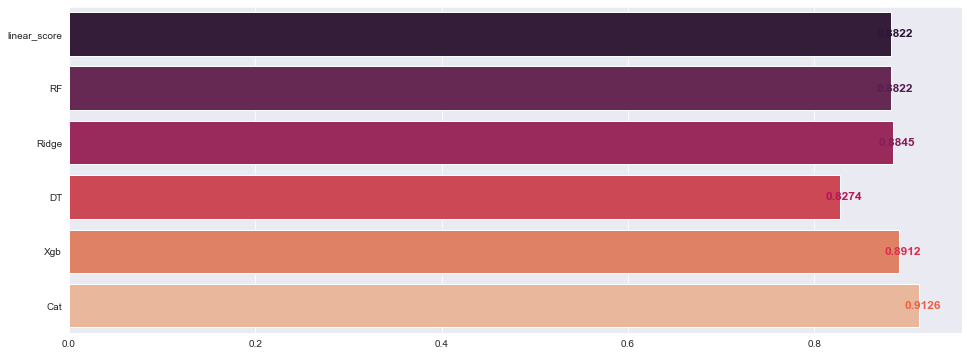

In [130]:
plt.figure(figsize = (16,6))
sec_score = sns.barplot(x = vals,y = key, palette="rocket")
for i in range(0,len(key)):
    sec_score.text(vals[i]+0.004,i,str(np.round(vals[i],4)),fontdict = dict(color = col[i],fontsize = 12,ha = 'center',va = 'center'),weight = 'bold')
